# Data Science Projekt Gotham City

### von Theo Remmert and Maximilian Urbanek

In diesem Projekt wird eine Datensammlung über fiktive Gebäude in Gotham City ausgewertet. Es sollen durch
Analysen die Merkmalszusammenhänge erschlossen, sowie graphische und statistische Evaluationen vorgenommen.

Ziel des Projektes ist es nun durch manuelle Datenanalyse und Machine Learning ein Modell zu trainieren, welches anhand
von den gegebenen Merkmalen den preis möglichst genau vorhersagen kann.

### Import basic packages

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Laden der Daten und erster Überblick

In [215]:
gotham_df = pd.read_csv('DatenAusgegeben1.2_UTF8_manuell.csv',';')

gotham_df.head()

,Grundstueck in qm,Grundstuecksform,Steigung,Bezirk,Zone,Lage,Typ,Zustand,Gebaut,Renoviert,...,Schlafzimmer,Kuechen,Kuechenqualitaet,Raeume,Garage Typ,Garagenkapazitaet,Pool,Verkaufsmonat,Verkaufsjahr,Preis
0,898,IR1,Nein,Somerset,RL,Norm,2Fam,4,2107,2107,...,6,2,3,10,Anbau,2,NaN,8,2136,156500
1,1326,Reg,Nein,North East,RL,Norm,1Fam,5,2133,2133,...,3,1,4,7,Anbau,3,NaN,1,2137,350000
2,725,Reg,Nein,Somerset,RL,Norm,1Fam,7,2096,2138,...,3,1,4,5,Freistehend,1,NaN,6,2140,137900
3,725,Reg,Nein,Somerset West,RL,Norm,1Fam,5,2135,2135,...,3,1,4,8,Anbau,2,NaN,4,2136,184000
4,697,Reg,Nein,Miller,RL,Norm,1Fam,5,2129,2129,...,3,1,4,7,Anbau,2,NaN,6,2140,189000


In [216]:
gotham_df.describe()

,Grundstueck in qm,Zustand,Gebaut,Renoviert,Zustand Fassade,Kellerflaeche in qm,Erster Stock in qm,Zweiter Stock in qm,Wohnflaeche in qm,Schlafzimmer,Kuechen,Kuechenqualitaet,Raeume,Garagenkapazitaet,Pool,Verkaufsmonat,Verkaufsjahr,Preis
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,9.000000,2000.000000,2000.000000,2000.000000
mean,950.054000,5.697500,2099.031000,2113.344500,3.102500,96.140500,106.48100,31.125000,137.990000,2.883000,1.042000,3.456500,6.405000,1.735500,2.444444,6.102500,2137.856500,176791.811500
std,737.437654,1.129439,29.120114,20.168198,0.386094,38.249893,34.40918,39.461551,45.565953,0.817095,0.203117,0.632699,1.523856,0.736757,1.130388,2.628773,1.304131,72060.407925
min,121.000000,1.000000,2005.000000,2080.000000,1.000000,0.000000,31.00000,0.000000,31.000000,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,2136.000000,39300.000000
25%,701.750000,5.000000,2083.000000,2095.000000,3.000000,74.000000,82.00000,0.000000,102.000000,2.000000,1.000000,3.000000,5.000000,1.000000,2.000000,4.000000,2137.000000,130000.000000
50%,887.000000,5.000000,2101.000000,2121.000000,3.000000,91.000000,99.00000,0.000000,133.000000,3.000000,1.000000,3.000000,6.000000,2.000000,2.000000,6.000000,2138.000000,158225.000000
75%,1078.000000,6.000000,2126.000000,2132.000000,3.000000,117.000000,126.00000,65.000000,161.000000,3.000000,1.000000,4.000000,7.000000,2.000000,3.000000,7.000000,2139.000000,207000.000000
max,19997.000000,9.000000,2140.000000,2140.000000,5.000000,298.000000,355.00000,174.000000,401.000000,6.000000,3.000000,5.000000,13.000000,4.000000,4.000000,12.000000,2140.000000,755000.000000


Wie zu sehen ist befinden sich im Datensatz Angaben über 2000 Verkäufe mit jeweils 28 Merkmalen

## Analyse durch Plotting

Der kommende Abschnitt enthält eine graphische Auswertung der einzelnen Merkmale zur
näheren Veranschaulichung und Beschreibung der Daten

### Grundstücksgröße

(0.0, 4000.0)

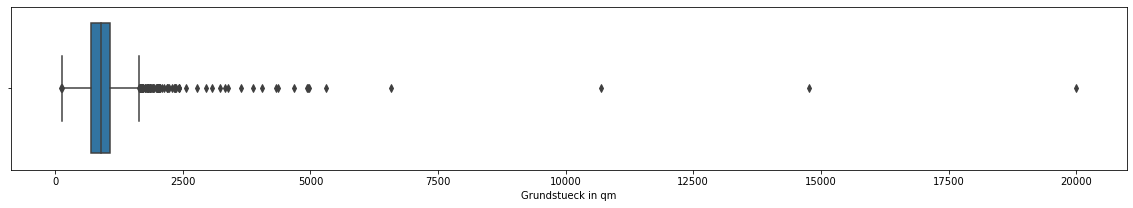

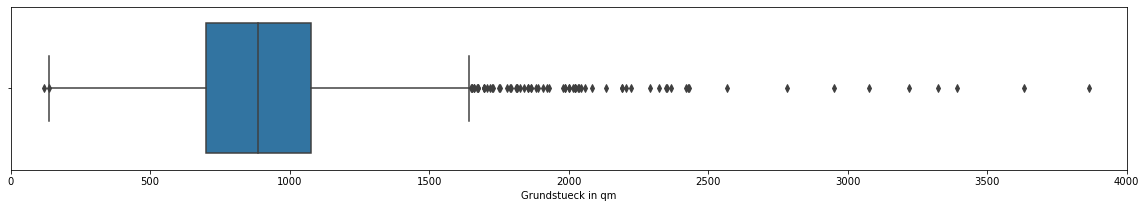

In [217]:
sns.color_palette("dark")
plt.figure(figsize=(20,3))
sns.boxplot(x=gotham_df['Grundstueck in qm'])

plt.figure(figsize=(20,3))
sns.boxplot(x=gotham_df['Grundstueck in qm'])
plt.xlim((0, 4000))

Auffällig bei der Grundstücksgröße ist, dass es einige Ausreißer gibt, insbesondere 4 Datenpunkte stechen dabei heraus (siehe 1. Grafik).
Beachtlich ist dies außerdem, da erkennbar ist, dass das 75% Perzentil der Grundstücke kleiner als 1079 Quadratmeter sind (siehe 2. Grafik).

In [218]:
print("Durchschnitt:", gotham_df.mean()['Grundstueck in qm'])
print("Median:", gotham_df.median()['Grundstueck in qm'])

Durchschnitt: 950.054
Median: 887.0


Die durchschnittliche Grundstücksgröße ist etwa 63 Quadratmeter größer als der Median, was vermutlich durch die besonders hohen Ausreißer erklärbar ist.

## Wohnfläche

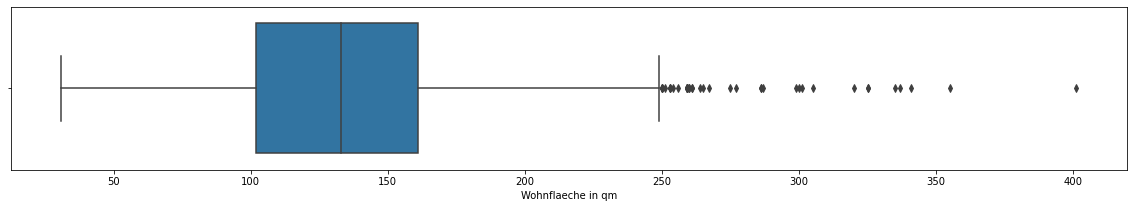

In [219]:
sns.color_palette("dark")
plt.figure(figsize=(20,3))
sns.boxplot(x=gotham_df['Wohnflaeche in qm'])

Bei der Wohnfläche haben die Hälfte der Immobilien zwischen ca. 100 Quadratmeter und 160 Quadratmeter.

In [220]:
print("Durchschnittsfläche: ", gotham_df['Wohnflaeche in qm'].mean())

Durchschnittsfläche:  137.99


Die durchschnittliche Größe der Gebäudeflächen liegt bei ca 138 Quadratmetern. Dieser Wert erscheint realistisch, da es sich bei den meisten Immobilien um Einfamilienhäuser handelt und der durchschnittswert für diese in Deutschland mit 140 Quadratmetern vergleichbar ist. (Quelle: https://www.fertighauswelt.de/hausbau/baulexikon/flaeche.html)

### Bezirke und Steigungen

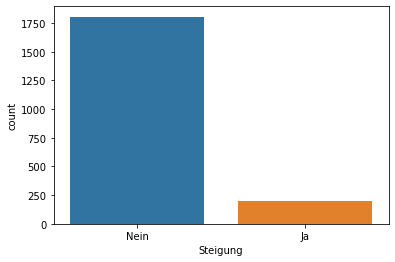

In [221]:
sns.countplot(x='Steigung', data=gotham_df)

In [222]:
# helper function for aggregation of columns and rows
def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()
    
    aggr = { key : [ len(df[(df[rows]==value) & (df[columns]==key)]) for value in row_keys]
               for key in column_keys }
    aggr_df = pd.DataFrame(aggr,index = row_keys)
    aggr_df.index.rename(rows,inplace=True)

    return aggr_df

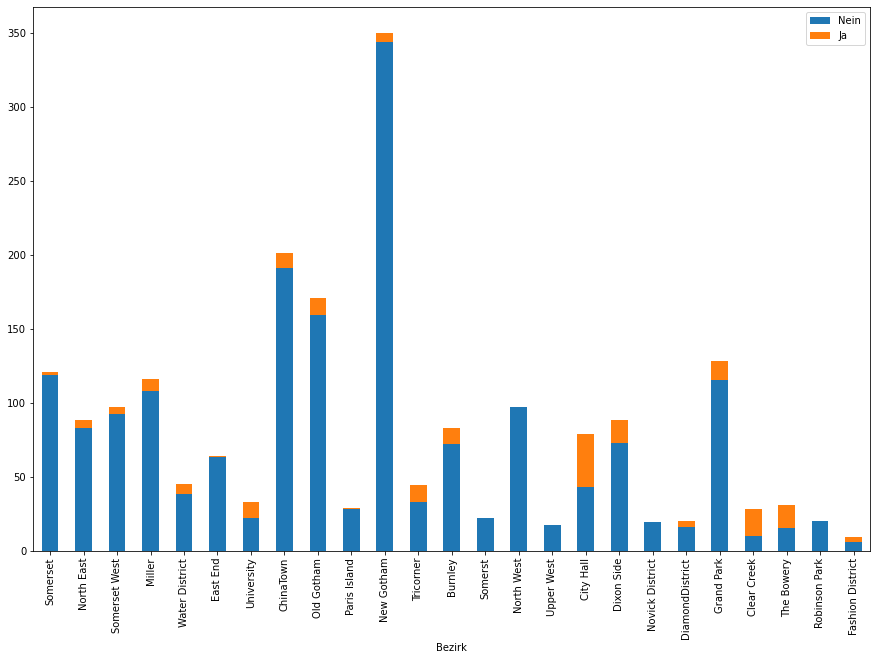

In [223]:
aggregate('Bezirk','Steigung',gotham_df).plot(kind='bar',stacked=True, figsize=(15,10))

Wie aus den Grafiken zu entnehmen ist, handelt es sich bei über 87,5% bzw. 1750 Gebäuden um Gebäude, welche auf flachem Gelände erbaut wurden.
Man kann davon ausgehen, dass es sich bei City Hall, Clear Creek und The Bowery um Bezirke handelt die auf Hügeln oder Tälern erbaut wurden,
da dort knapp 50% oder sogar über 50% der Gbeäude auf Gelände mit Steigung stehen.

Ebenfalls ist zu erkennen, dass New Gotham City der mit Abstand größte Bezirk ist und sich dort über 350 der 2000 Häuser befinden.

### Art der Gebäude

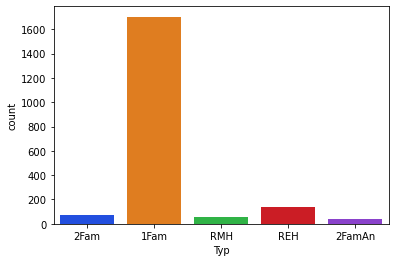

In [224]:
sns.countplot(x='Typ', data=gotham_df, palette='bright')

Wie zu erkennen ist sind die meisten Häuser klassische Einfamilienhäuser

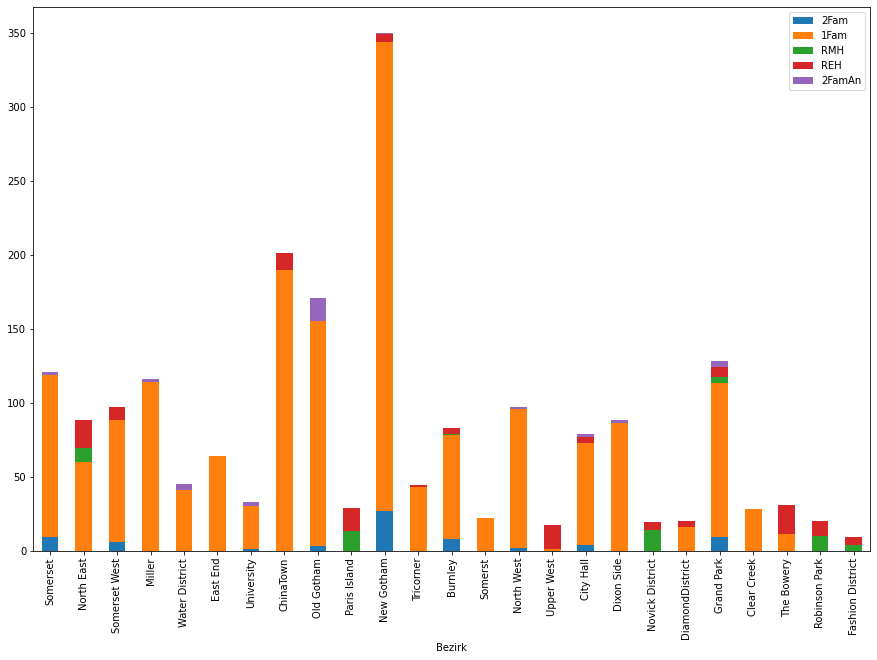

In [225]:
aggregate('Bezirk','Typ',gotham_df).plot(kind='bar',stacked=True, figsize=(15,10))

Interessant ist, dass obwohl beinahe alle Gebäude Einfamilienhäuser sind, sich in den Bezirken Paris Island, Upper West, Novick District, Robinson Park und im Fashion District
beinahe keine Häuser dieses Typs befinden. Da diese Bezirke allerdings recht klein sind hat dies eine mäßige Auswirkung auf das Gesamtbild.

## Austattung

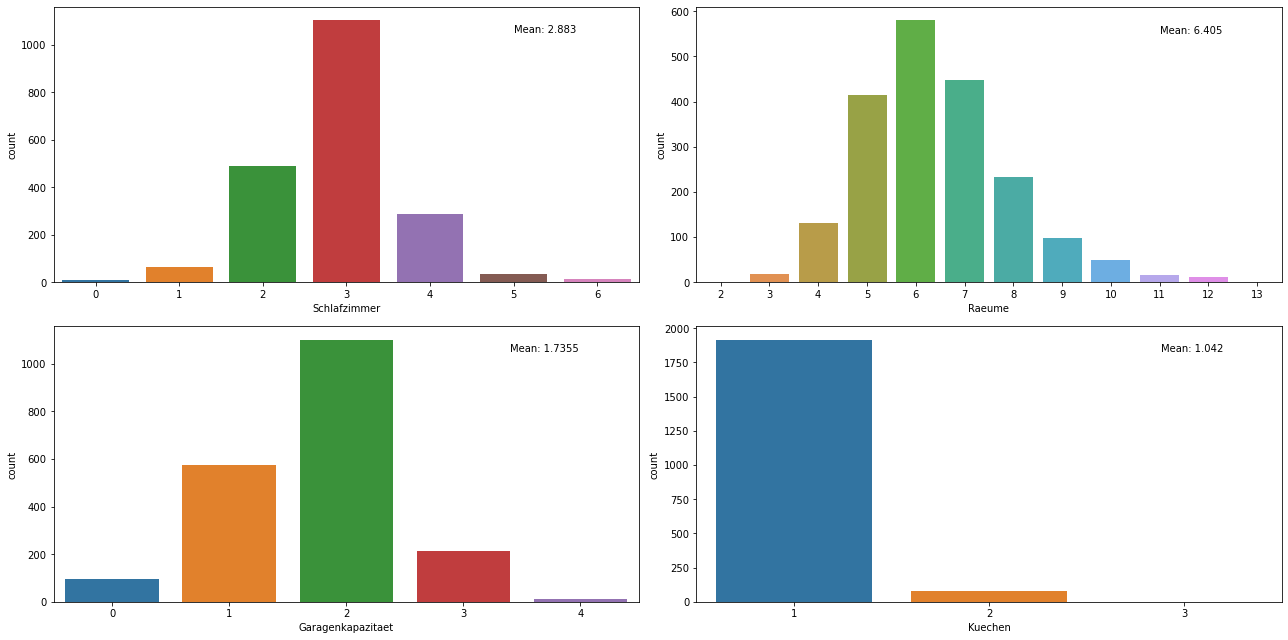

In [226]:
fig = plt.figure(figsize=(18,9))

plot_1 = fig.add_subplot(2,2,1)
mean_schlafzimmer = str(gotham_df.mean()['Schlafzimmer'])
plot_1.text(5, 1050, 'Mean: '+ mean_schlafzimmer, fontsize=10)
sns.countplot(data=gotham_df, x='Schlafzimmer')

plot_2 = fig.add_subplot(2,2,2)
mean_raeume = str(gotham_df.mean()['Raeume'])
plot_2.text(9, 550, 'Mean: '+ mean_raeume, fontsize=10)
sns.countplot(data=gotham_df, x='Raeume')

plot_3 = fig.add_subplot(2,2,3)
mean_garage = str(gotham_df.mean()['Garagenkapazitaet'])
plot_3.text(3.4, 1050, 'Mean: '+ mean_garage, fontsize=10)
sns.countplot(data=gotham_df, x='Garagenkapazitaet')

plot_4 = fig.add_subplot(2,2,4)
mean_kuechen = str(gotham_df.mean()['Kuechen'])
plot_4.text(1.88, 1830, 'Mean: '+ mean_kuechen, fontsize=10)
sns.countplot(data=gotham_df, x='Kuechen')

plt.tight_layout()

Bei näherer Betrachtung der Auststattungsmerkmale zeichnet sich ab, dass die Besitzer nach Ab- bzw. Aufrundung der "Mean"-Werte durchschnittlich ein Gebäude mit 6 Räumen besitzen, wovon 3 Schlafzimmer sind.
Des Weiteren hat ein Gebäude im Schnitt 2 Garagen und eine 1 Küche. Man könnte diese Werte wohl als sehr hoch im Kontrast zu anderen Städten sehen, besonders, wenn man in betracht zieht, dass es
sich bei den meisten Gebäuden um Einfamilienhäuser handelt.

## Preis

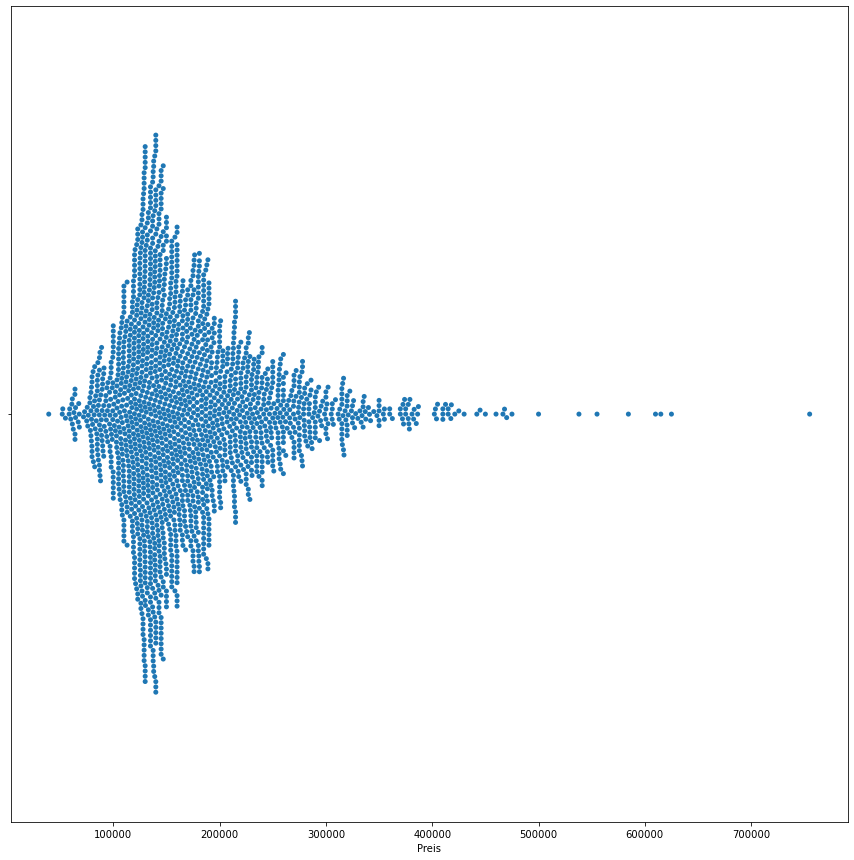

In [227]:
plt.figure(figsize=(15,15))
sns.swarmplot(x=gotham_df['Preis'])

In [228]:
print("Durchschnitt:\t", gotham_df.mean()['Preis'])
print("Min:\t\t", gotham_df.min()['Preis'])
print("Max:\t\t", gotham_df.max()['Preis'])

Durchschnitt:	 176791.8115
Min:		 39300
Max:		 755000


Wie in der Grafik zu erkennen haben die meisten Gebäude einen Verkaufswert zwischen 100000 und 250000 Gotham Dollar. Dabei liegt der Durchschnittliche Preis bei 176791`G$`. Der niedrigste Gebäudewert wurde mit 39300 und der höchste mit 755000`G$` erreicht.

## Verkaufszeitpunkte

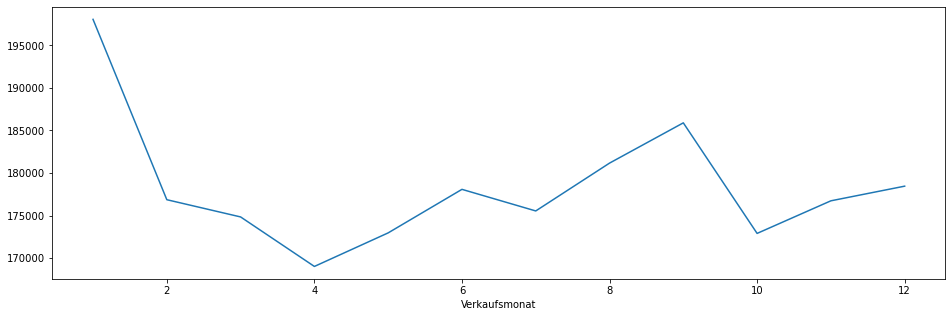

In [229]:
fig = plt.figure(figsize=(16,5))
gotham_df.groupby('Verkaufsmonat').mean()['Preis'].plot()

Anhand einer einer Analyse der erzielten Preise in den einzelnen Verkaufsmonaten lässt sich erkennen, dass zu Jahresbeginn Preis von knapp 200000`G$` erzielt werden, welche deutlich über dem Durchschnitt liegen. Nach einem Abflachen der Durchschnittpreise konnten erst wieder in den Sommer- bis Herbstmonaten höhere Preise erzielt werden.

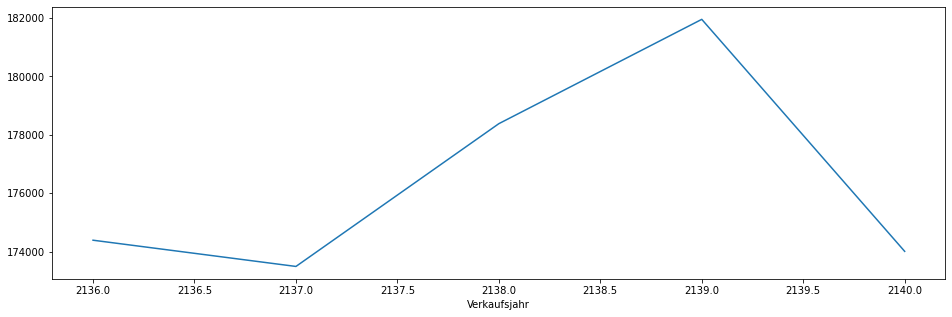

In [230]:
fig = plt.figure(figsize=(16,5))
gotham_df.groupby('Verkaufsjahr').mean()['Preis'].plot()

Wie zu erkennen wurden die verkaufaufzeichnungen erst ab dem Jahr 2136 registriert, weswegen es schwierig ist Trendkurven, bzw. wiederholenede Muster zu erkennen. Auffällig ist lediglich die Tatsache das nach einem steilen Anstieg über 3 Jahre von 2137 bis 2139 eine rapider Einbruch der Durchschnittspreise binnen eines Jahre zu verzeichnen war. Grund hierfür könnte eine Wirtschaftskrise sein, allerdings handelt es sich dabei um reine Spekulation.

## Bewertung der Daten

Aufgrund der Vielzahl an Merkmalen bildet sich eine aussichtsreiche Basis für ein Modell zum Vorhersagen der Preise.
Die Daten selbst zeigen keine sonderlich ausschlaggebenden Anomalien, welche den Erfolg des Trainings gefährden könnten.

Allerdings müssen die Daten noch in ein einheitliches Format übergeben und Korrelationen geprüft werden, um genauere
Erkenntnisse über die Relevanz der einzelnen Merkmale zu erhalten.

## Datenvorverarbeitung und Korrelationsanalyse

In [231]:
#convert columns with a string datapoint to display in correlation Matrix and preprocess for training and test data
from sklearn import preprocessing

gotham_df['Pool'].fillna(0, inplace=True, downcast='int64')

learn_df = gotham_df

learn_df['Garage Typ'].fillna('Keine', inplace=True, downcast='int64')

learn_attributes = ['Grundstuecksform', 'Bezirk', 'Zone', 'Lage', 'Typ', 'Heizung', 'Heizungsqualitaet', 'Klimaanlage', 'Garage Typ', 'Steigung']

for attribute in learn_attributes:
    label_enc = preprocessing.LabelEncoder()
    label_enc.fit(learn_df[attribute])
    learn_df[attribute] = label_enc.transform(learn_df[attribute])

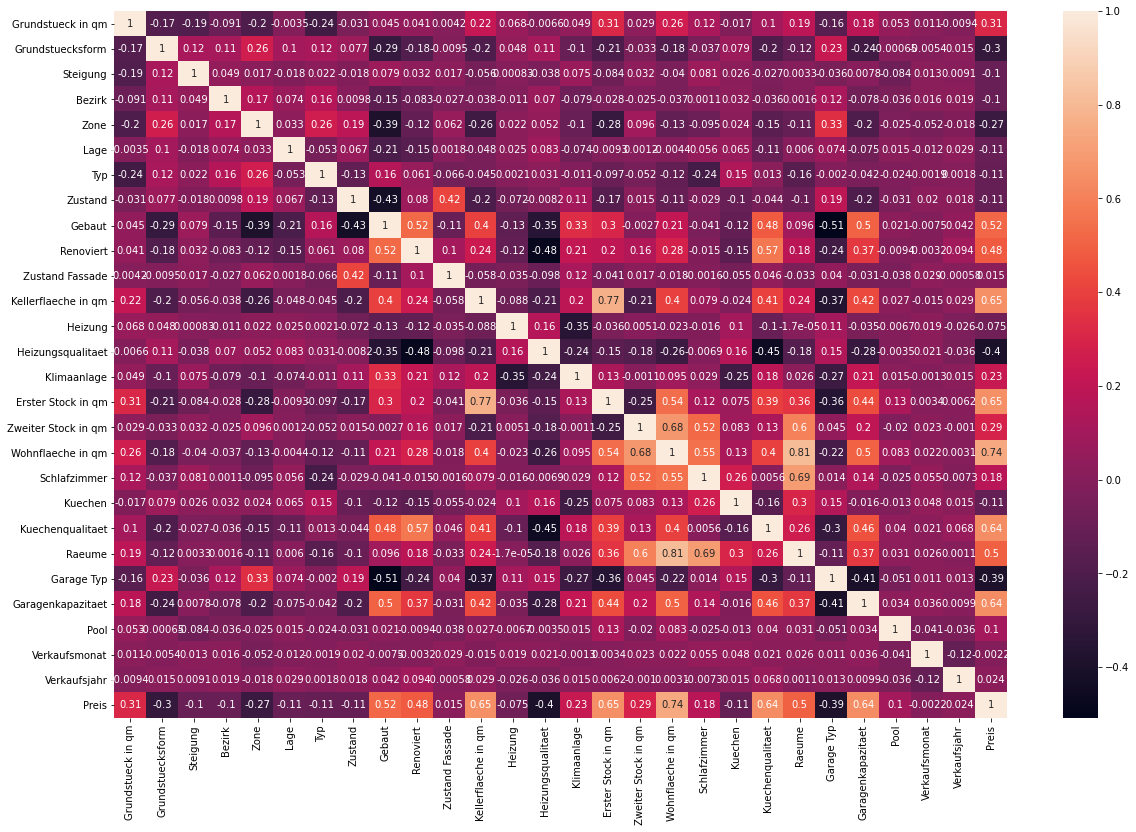

In [232]:
# show a correlation matrix for columns with integer datapoints to see if theres some feature significance
plt.subplots(figsize=(20,13))
corrMatrix = gotham_df.corr()
sns.heatmap(corrMatrix, annot=True)

Neben einigen moderaten korrelationen ist leidiglich eine positiv ssignifikante Korrelation zwischen der Wohnflaeche und der Anzahl der Räume zu verzeichnen.
Diese Korrelation wird im Folgenden graphisch geprüft und dem Verkaufspreis gegenüber gestellt

(0.0, 500000.0)

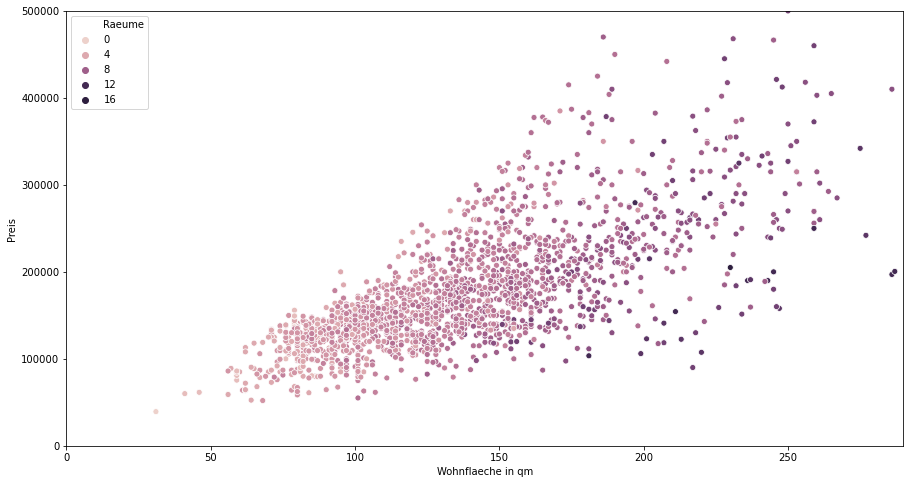

In [233]:
fig = plt.figure(figsize=(15,8))
sns.scatterplot(x=learn_df['Wohnflaeche in qm'], y=learn_df['Preis'], hue=learn_df["Raeume"])

plt.xlim((0, 290))
plt.ylim((0, 500000))

In der Tat ist erkennbar, dass mit steigender Anzahl der Räume auch die Größe der Wohhnflaeche zu wachsen scheint. Ebenfalls zeigt sich zu Beginn ein stark positive Korrelation zum Verkaufspreis ab, diese streut allerdings ab größeren Flaechen zu stark unterhalb von y=1, um diese eindeutig indentifizieren zu können.

## Datenmodellierung und Training

### Data Split

In [234]:
# delete target value from dataset
X = learn_df.drop('Preis', axis=1)
y = learn_df['Preis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Nun wird mithilfe der Anwendung verschiedener Trainingsmodelle geprüft, welches Modell sich für diesen Datensatz am besten eignet

In [235]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge

### Gradient Boosting

In [236]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

### Random Forest

In [237]:
rf_model = RandomForestRegressor(n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

### Linear Regression

In [238]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

### Bayesian Ridge

In [239]:
br_model = BayesianRidge()
br_model.fit(X_train, y_train)

BayesianRidge()

Definieren einer Hilfsfunktion für den durchschnittlichen absoluten Fehler

## Wahl des Trainingsmodells

In [240]:
from sklearn.metrics import r2_score, mean_squared_error, max_error

### Gradient Boosting

In [241]:
gb_r2_train = r2_score(y_true=y_train, y_pred=gb_model.predict(X_train))
gb_r2_test = r2_score(y_true=y_test, y_pred=gb_model.predict(X_test))

print("Accuracy:\nTrain: "+str(gb_r2_train*100)+"%, "+"Test: "+str(gb_r2_test*100)+"%")

Accuracy:
Train: 95.62194183583316%, Test: 88.37142646459505%


### Random Forest

In [242]:
rf_r2_train = r2_score(y_true=y_train, y_pred=rf_model.predict(X_train))
rf_r2_test = r2_score(y_true=y_test, y_pred=rf_model.predict(X_test))

print("Accuracy:\nTrain: "+str(rf_r2_train*100)+"%, "+"Test: "+str(rf_r2_test*100)+"%")

Accuracy:
Train: 98.42594465469594%, Test: 88.07231899918997%


### Linear Regression

In [243]:
lr_r2_train = r2_score(y_true=y_train, y_pred=lr_model.predict(X_train))
lr_r2_test = r2_score(y_true=y_test, y_pred=lr_model.predict(X_test))

print("Accuracy:\nTrain: "+str(lr_r2_train*100)+"%, "+"Test: "+str(lr_r2_test*100)+"%")

Accuracy:
Train: 86.07571931690204%, Test: 85.6570426176104%


### Bayesian Ridge

In [244]:
br_r2_train = r2_score(y_true=y_train, y_pred=br_model.predict(X_train))
br_r2_test = r2_score(y_true=y_test, y_pred=br_model.predict(X_test))

print("Accuracy:\nTrain: "+str(br_r2_train*100)+"%, "+"Test: "+str(br_r2_test*100)+"%")

Accuracy:
Train: 86.04210497857274%, Test: 85.62585331953002%


Aufgrund der sehr guten Ergebnisse wird von nun an das Random Forest Regressionsverfahren verwendet 

## Hyperparameter tuning

Um das Training bei Baummodellen möglichst effizent zu gestalten lässt sich durch das Hyperparameter Tuning
bestimmen, welche Parameter optimale Ergebnisse liefern können

In [245]:
from sklearn.model_selection import RandomizedSearchCV
import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


Nun ist es Zeit für das Hyperparameter Training

In [246]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [247]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

Oben sind die optimierten parameter für unser Datenset zu sehen, welche für die abschließende Evaluation angewendet werden können.

## Feature Selection

Unser Ziel ist es in erster Linie den "Root Mean Squared Error" kurz RMSE zu minimieren, da diese angibt wie groß der durchschnittliche Fehler bei der Preisangabe der Vorhersage ist.

Um dies zu erreichen wird eine Feature Selection anahnd der "Importance" der jeweiligen Kategorien durchgeführt durchgeführt

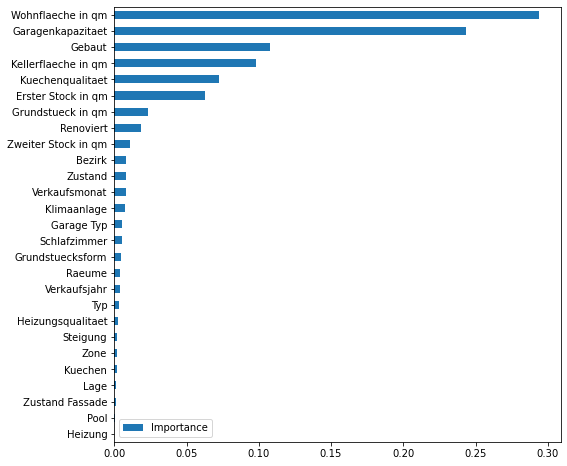

In [248]:
importance = rf_model.feature_importances_
importance = pd.DataFrame(importance, index=X_train.columns, columns=["Importance"])
importance = importance.sort_values(by=['Importance'],ascending=True)

importance.plot(kind='barh', figsize=(8,8))

Im obigen Graphen werden die Features absteigend Importance angegeben. Diese angaben stimmen mit den bisherigen Analysen überein

Nun soll herausgefunden werden ab welcher "Importance" der Fehler minimiert werden kann.

In [249]:
importance_thresholds = [0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25]

results = {}

for importance_threshold in importance_thresholds:

    selected_features = importance[importance['Importance'] >= importance_threshold].index

    X_train_sf = X_train[selected_features].copy()
    y_train_sf = y_train.copy()

    X_test_sf = X_test[selected_features].copy()
    y_test_sf = y_test.copy()

    rf_model_sf = RandomForestRegressor()
    rf_model_sf.fit(X_train_sf, y_train_sf)

    rmse_train = mean_squared_error(y_true=y_train_sf, y_pred=rf_model_sf.predict(X_train_sf), squared=False)
    rmse_test = mean_squared_error(y_true=y_test_sf, y_pred=rf_model_sf.predict(X_test_sf), squared=False)
    
    results[importance_threshold] = {"point": str(importance_threshold),"rmse_train": rmse_train ,"rmse_test": rmse_test}

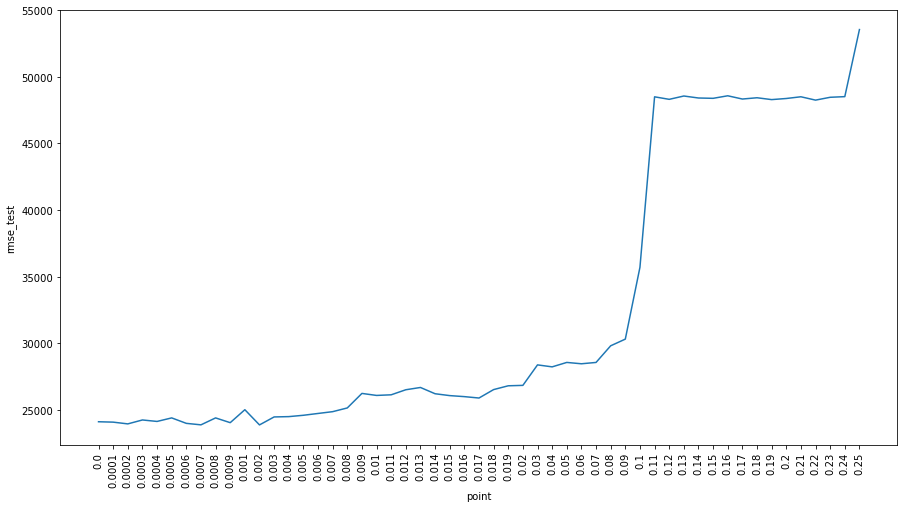

In [250]:
learn_df_results = pd.DataFrame.from_dict(results, orient="index")

plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x="point", y="rmse_test", data=learn_df_results)

(23000.0, 30000.0)

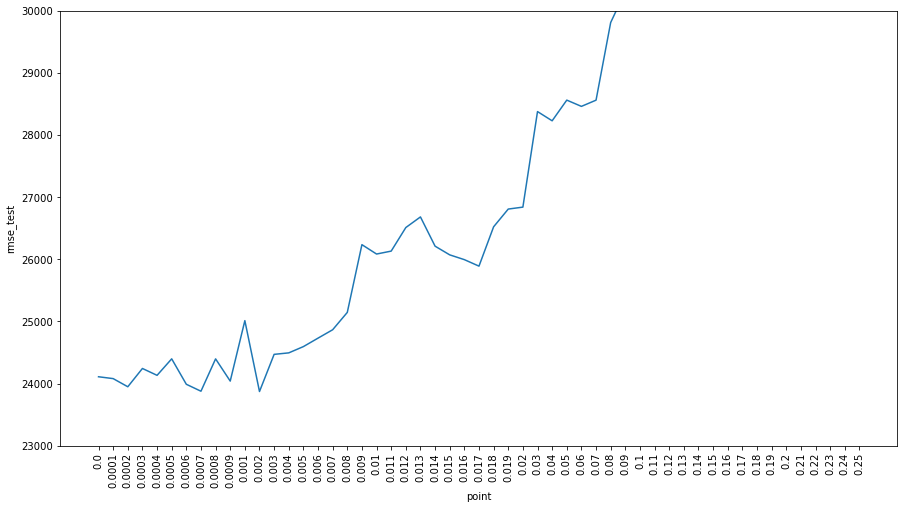

In [251]:
learn_df_results = pd.DataFrame.from_dict(results, orient="index")

plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x="point", y="rmse_test", data=learn_df_results)
plt.ylim((23000, 30000))

Da der geringste Fehler bei einer Feauture Importance von >= 0,001 erreicht wird, werden für den optimierten Datensatz alle Features entfernt, die einen kleineren Wert als diesen aufweisen.

(0.0, 0.001)

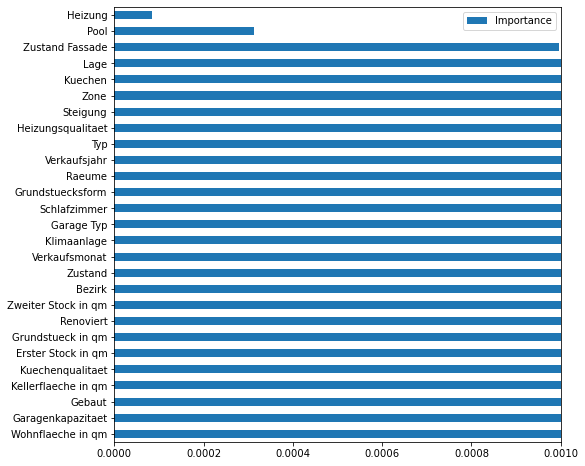

In [252]:
importance = rf_model.feature_importances_
importance = pd.DataFrame(importance, index=X_train.columns, columns=["Importance"])
importance = importance.sort_values(by=['Importance'],ascending=False)

importance.plot(kind='barh', figsize=(8,8))
plt.xlim((0, 0.001))

Wie zu sehen ist fallen damit die Merkmale Heizung und Pool aus unserem Modell

In [253]:
importance_threshold = 0.001
selected_features = importance[importance['Importance'] >= importance_threshold].index

X_train_sf_final = X_train[selected_features].copy()
y_train_sf_final = y_train.copy()

X_test_sf_final = X_test[selected_features].copy()
y_test_sf_final = y_test.copy()

pprint.pprint(selected_features)

Index(['Wohnflaeche in qm', 'Garagenkapazitaet', 'Gebaut',
       'Kellerflaeche in qm', 'Kuechenqualitaet', 'Erster Stock in qm',
       'Grundstueck in qm', 'Renoviert', 'Zweiter Stock in qm', 'Bezirk',
       'Zustand', 'Verkaufsmonat', 'Klimaanlage', 'Garage Typ', 'Schlafzimmer',
       'Grundstuecksform', 'Raeume', 'Verkaufsjahr', 'Typ',
       'Heizungsqualitaet', 'Steigung', 'Zone', 'Kuechen', 'Lage'],
      dtype='object')


Unser endgültiges Set hat somit 25 Merkmale

## Evaluation

### Random Forest: alle Features und Standard-Parameter

In [255]:
rf_model_standard = RandomForestRegressor()
rf_model_standard.fit(X_train, y_train)

rmse_test_standard = mean_squared_error(y_true=y_test, y_pred=rf_model_standard.predict(X_test), squared=False)

print("RMSE Test: "+str(rmse_test_standard))

RMSE Test: 24255.77707038631


### Random Forest: ausgewählte Features und Standard-Parameter

In [262]:
rf_model_sf = RandomForestRegressor()
rf_model_sf.fit(X_train_sf_final, y_train_sf_final)

rmse_test_sf = mean_squared_error(y_true=y_test_sf_final, y_pred=rf_model_sf.predict(X_test_sf_final), squared=False)

print("RMSE Test: "+str(rmse_test_sf))

RMSE Test: 24167.10663597267


### Random Forest: ausgewählte Features und Tuning-Parameter

In [257]:
rf_model_sf_ht = RandomForestRegressor(n_estimators=rf_random.best_params_['n_estimators'], min_samples_split=rf_random.best_params_['min_samples_split'], min_samples_leaf=rf_random.best_params_['min_samples_leaf'],
                                       max_features=rf_random.best_params_['max_features'], max_depth=rf_random.best_params_['max_depth'], bootstrap=rf_random.best_params_['bootstrap'])
rf_model_sf_ht.fit(X_train_sf_final, y_train_sf_final)

rmse_test_sf_ht = mean_squared_error(y_true=y_test_sf_final, y_pred=rf_model_sf_ht.predict(X_test_sf_final), squared=False)

print("RMSE Test: "+str(rmse_test_sf_ht))

RMSE Test: 23111.70252972006


Wie zu erkennen ist, konnte aufgrund der Feature Selection der durchschnittliche Fehler einer Prediction um über 1000`G$` gesenkt werden und unter Einbung des Hyperparameter Tunings ein
noch besseres Ergebnis erzielt werden. Die durchschnittliche Abweichung vom vorhersagten Preis liegt dementsprechend in dem optimierten Modell bei ca. 23112`G$` 

## Evaluation

In [258]:
# helper function for MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [259]:
r2_score_final = r2_score(y_true=y_test_sf_final, y_pred=rf_model_sf_ht.predict(X_test_sf_final))
print("R2: "+str(r2_score_final))

mean_squared_error_final = mean_squared_error(y_true=y_test_sf_final, y_pred=rf_model_sf_ht.predict(X_test_sf_final))
print("MSE: "+str(mean_squared_error_final))

root_mean_squared_error_final = mean_squared_error(y_true=y_test_sf_final, y_pred=rf_model_sf_ht.predict(X_test_sf_final), squared=False)
print("RMSE: "+str(root_mean_squared_error_final))

mean_absolute_percentage_error_final = mean_absolute_percentage_error(y_true=y_test_sf_final, y_pred=rf_model_sf_ht.predict(X_test_sf_final))
print("MAPE: "+str(mean_absolute_percentage_error_final))

maximum_error_final = max_error(y_true=y_test_sf_final, y_pred=rf_model_sf_ht.predict(X_test_sf_final))
print("MAX: "+str(maximum_error_final))

R2: 0.891460675730094
MSE: 534150793.82226855
RMSE: 23111.70252972006
MAPE: 0.08839948278760465
MAX: 148229.1725


Im schlussendlichen Ergenis kann das Modell mit einer Genauigkeit von ca. 89,1`%` den Preis vorhersagen

Der durchschnittliche Fehler beim vorhergesagten Preis liegt bei 23111`G$` und der maximal erreichte Fehler war 148229`G$`.

Das Modell liefert recht solide Ergebnisse und ist sicherlich im realen Umfeld nutbar, allerdings könnte die Genauigkeit sicherlich noch optimiert werden.
Auch den maximalen fehler sollte man nicht vernachlässigen, da bei einem maximalen Preis einer Immobilie von 755000`G$`ein eine Abweichung von 148229`G$` als zu hoch eingestuft werden kann.

### Beispielvorhersage

In [260]:
test_prediction = X_test_sf_final.iloc[1:2] # 2nd row only
real_price = y_test_sf_final.iloc[1:2]
price_prediction = rf_model_sf_ht.predict(test_prediction)

print("Vorhergesagter Preis: "+str(price_prediction))
print("Tatsächlicher Preis: "+str(real_price))

Vorhergesagter Preis: [206761.35]
Tatsächlicher Preis: 353    219500
Name: Preis, dtype: int64


In diesem Beispiel wurde der Preis anhand der gegebenen Merkmale aus dem finalen Modell mit 206761`G$` beziffert. Der tatsächliche Preis liegt bei 219500`G$`.
Damit ergibt sich eine Abweichung von 13242`G$`

Das Ziel sinnvolle Vorhersagen erzielen zu können wurde erreicht.